In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install seaborn
!pip install statsmodels
!pip install scikit-learn
!pip install xgboost

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [5]:
# Load dataset
df = pd.read_csv("AirQualityUCI.csv", sep = ";", decimal=',')

print(df.shape)
df.head()

(9471, 17)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [6]:
# Clean input table
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16"])
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
# Check missing NA
missing_counts = df.isna().sum()
print(missing_counts)

print(df.isna())

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64
       Date   Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
0     False  False   False        False     False     False          False   
1     False  False   False        False     False     False          False   
2     False  False   False        False     False     False          False   
3     False  False   False        False     False     False          False   
4     False  False   False        False     False     False          False   
...     ...    ...     ...          ...       ...       ...            ...   
9466   True   True    True         True      True      True           True   
9467   True   True    True         True      Tru

In [8]:
# Remove NAs
df = df.dropna()

missing_counts = df.isna().sum()
print(missing_counts)

# Total records
total_records = df.shape[0]
print(f"Total records: {total_records}")

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
Total records: 9357


In [9]:
# Check missing values
missing_counts = (df == -200).sum()
print(missing_counts)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [10]:
# Transform missing values -200 to NAs
df.replace(-200, pd.NA, inplace=True)
missing_counts = df.isna().sum()
print(missing_counts)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [11]:
# Handle missing values
# For few missing data -> remove the records
df = df.dropna(subset=['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'])
missing_counts = df.isna().sum()
print(missing_counts)

# Total records
total_records = df.shape[0]
print(f"Total records: {total_records}")

Date                0
Time                0
CO(GT)           1647
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)          1595
PT08.S3(NOx)        0
NO2(GT)          1598
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64
Total records: 8991


In [12]:
# Handle missing values
# Replace missing values with mean
for column in ['CO(GT)', 'NOx(GT)', 'NO2(GT)']:
    df[column] = df[column].fillna(df[column].mean())
missing_counts = df.isna().sum()
print(missing_counts)

# Total records
total_records = df.shape[0]
print(f"Total records: {total_records}")

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)         8104
C6H6(GT)            0
PT08.S2(NMHC)       0
NOx(GT)             0
PT08.S3(NOx)        0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64
Total records: 8991


<ipython-input-12-9dbdbeeba803>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mean())


In [13]:
# Handle missing values
# Drop the column
df = df.drop(columns=['NMHC(GT)'])
missing_counts = df.isna().sum()
print(missing_counts)

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [14]:
for column in df.select_dtypes(include='number'):
    print(column, df[column].mean())

CO(GT) 2.1297113289760343
NOx(GT) 242.18929150892376
NO2(GT) 112.14513729203303


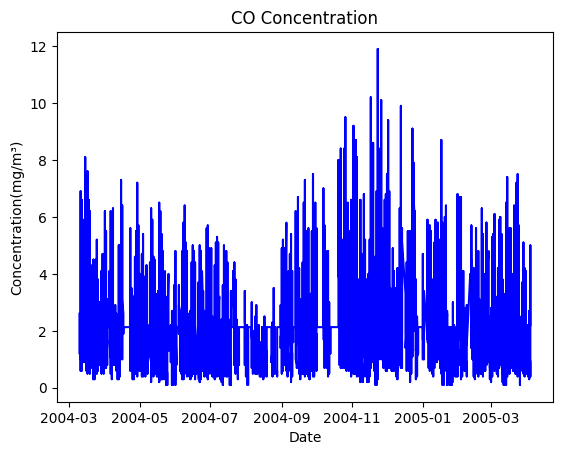

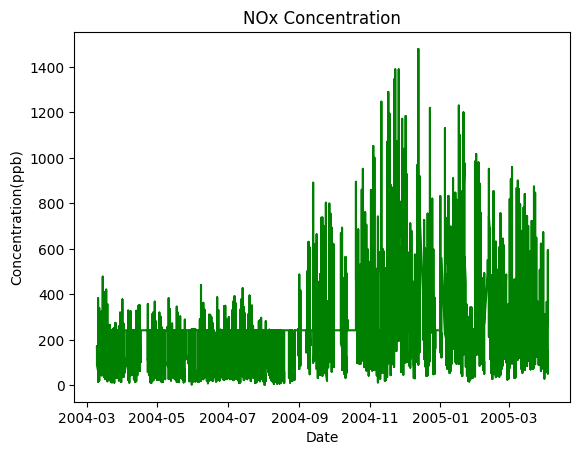

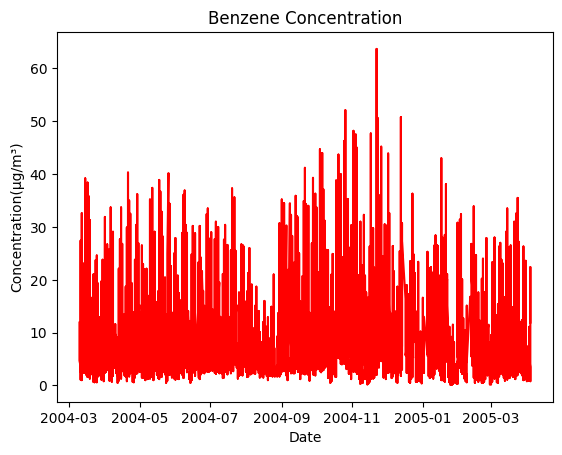

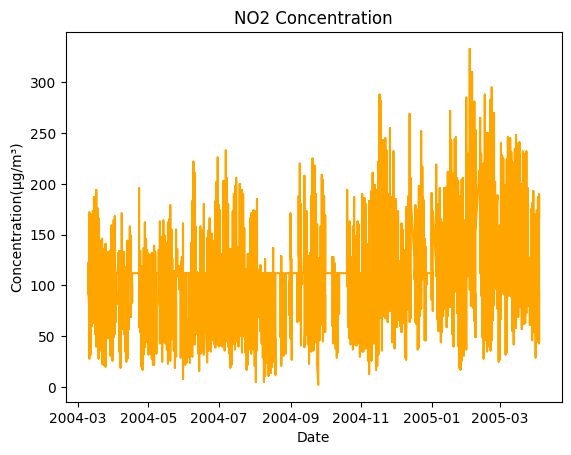

In [15]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Plot CO concentration
plt.plot(df['Date'], df['CO(GT)'], color='blue')
plt.title('CO Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration(mg/m³)')
plt.show()

# Plot NOx concentration
plt.plot(df['Date'], df['NOx(GT)'], color='green')
plt.title('NOx Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration(ppb)')
plt.show()

# Plot Benzene concentration
plt.plot(df['Date'], df['C6H6(GT)'], label='Benzene Concentration', color='red')
plt.title('Benzene Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration(µg/m³)')
plt.show()

# Plot NO2 concentration
plt.plot(df['Date'], df['NO2(GT)'], label='NO2 Concentration', color='orange')
plt.title('NO2 Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration(µg/m³)')
plt.show()

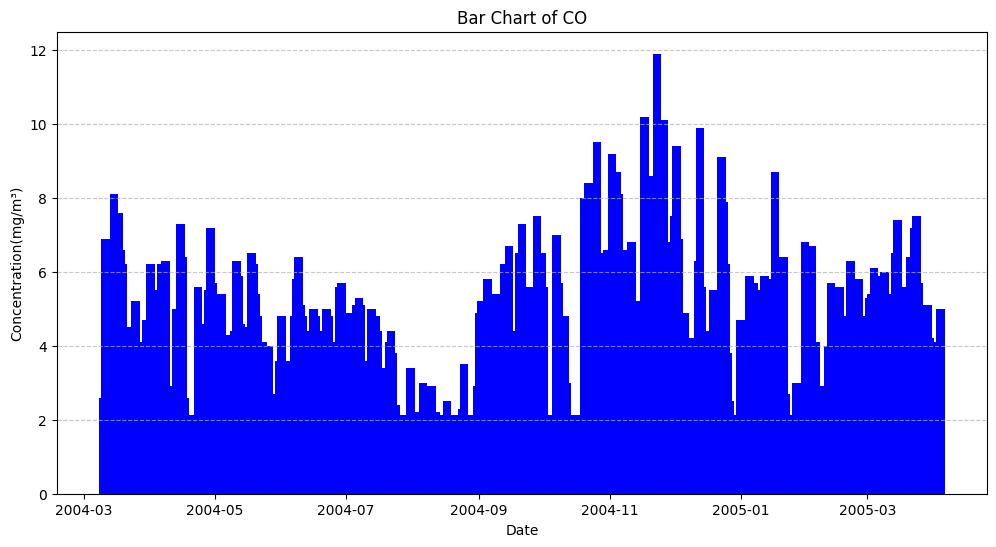

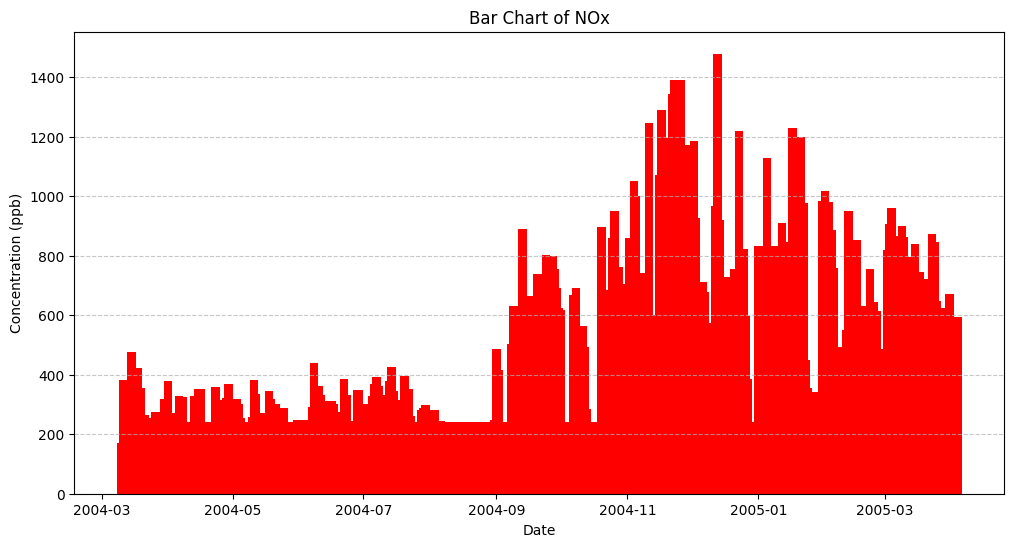

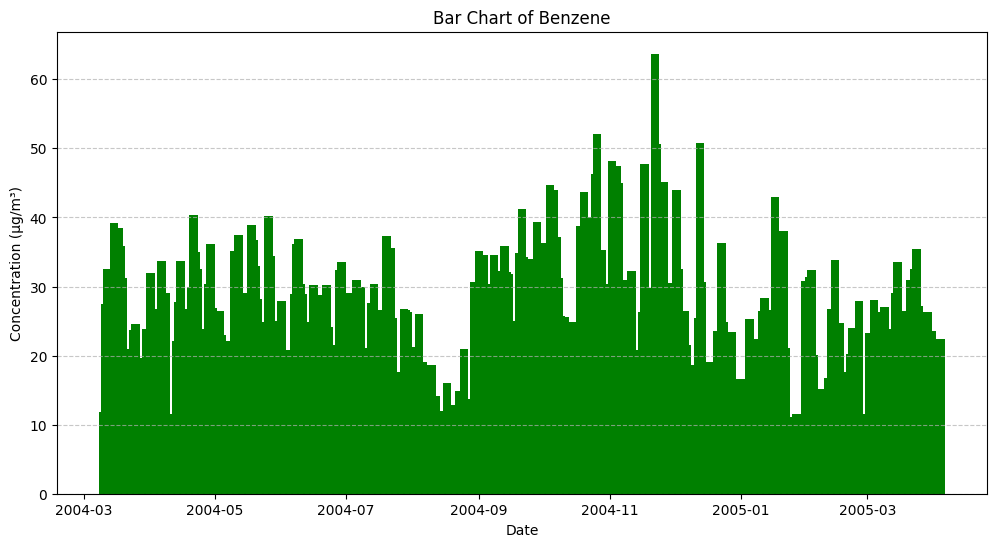

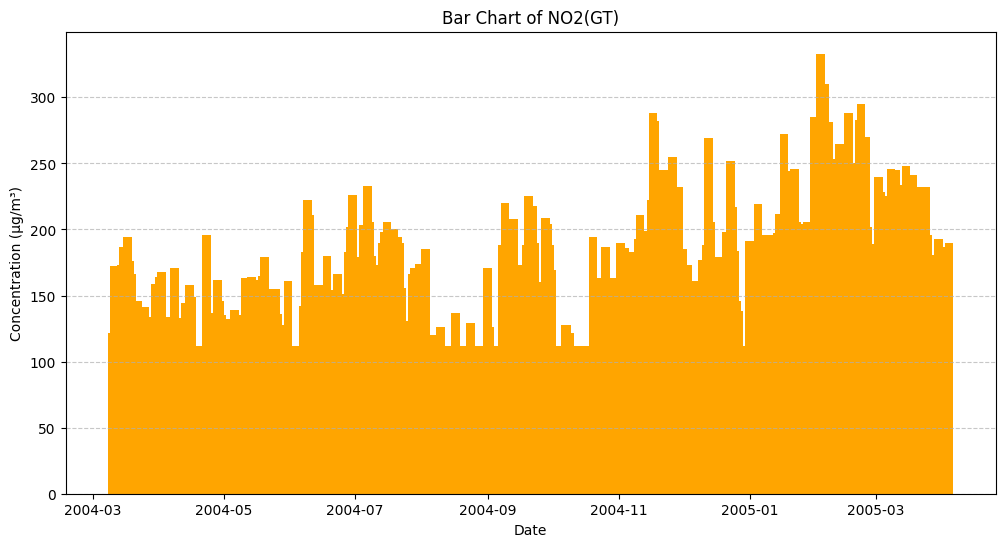

In [16]:
# Plot bar graph
# Plot for CO
fig, ax = plt.subplots(figsize=(12, 6))
width = 4
ax.bar(df['Date'], df['CO(GT)'], width=width, color='blue')

ax.set_xlabel("Date")
ax.set_ylabel("Concentration(mg/m³)")
ax.set_title("Bar Chart of CO")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot for NOx
fig, ax = plt.subplots(figsize=(12, 6))
width = 4
ax.bar(df['Date'], df['NOx(GT)'], width=width, color='red')

ax.set_xlabel("Date")
ax.set_ylabel("Concentration (ppb)")
ax.set_title("Bar Chart of NOx")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot for Benzene
fig, ax = plt.subplots(figsize=(12, 6))
width = 4
ax.bar(df['Date'], df['C6H6(GT)'], width=width, color='green')

ax.set_xlabel("Date")
ax.set_ylabel("Concentration (µg/m³)")
ax.set_title("Bar Chart of Benzene")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot for NO2(GT)
fig, ax = plt.subplots(figsize=(12, 6))
width = 4
ax.bar(df['Date'], df['NO2(GT)'], width=width, color='orange')

ax.set_xlabel("Date")
ax.set_ylabel("Concentration (µg/m³)")
ax.set_title("Bar Chart of NO2(GT)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

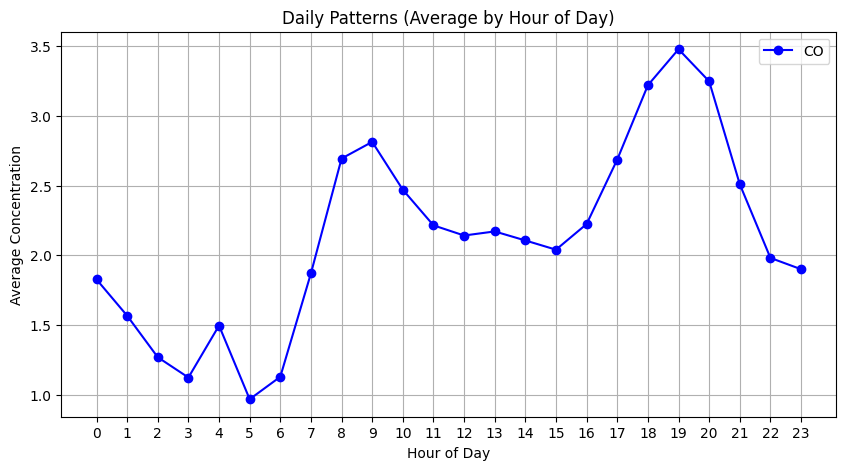

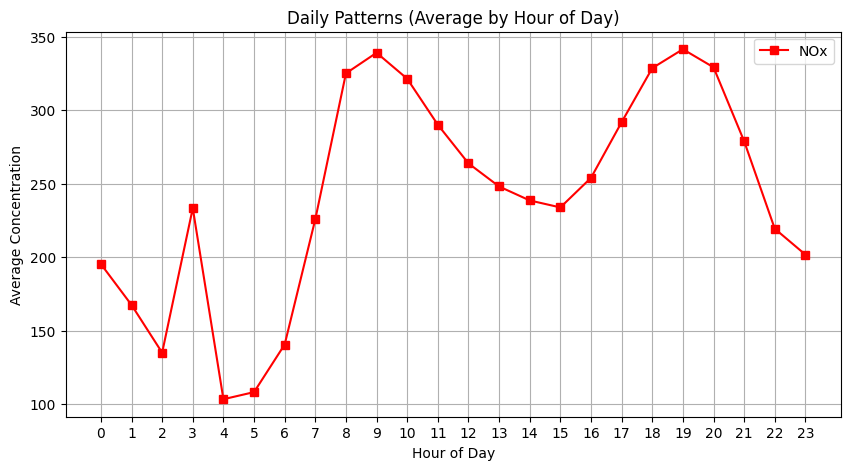

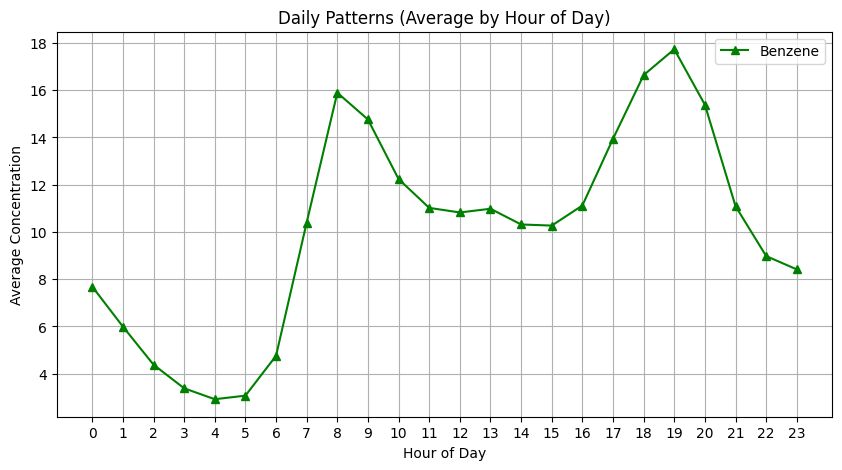

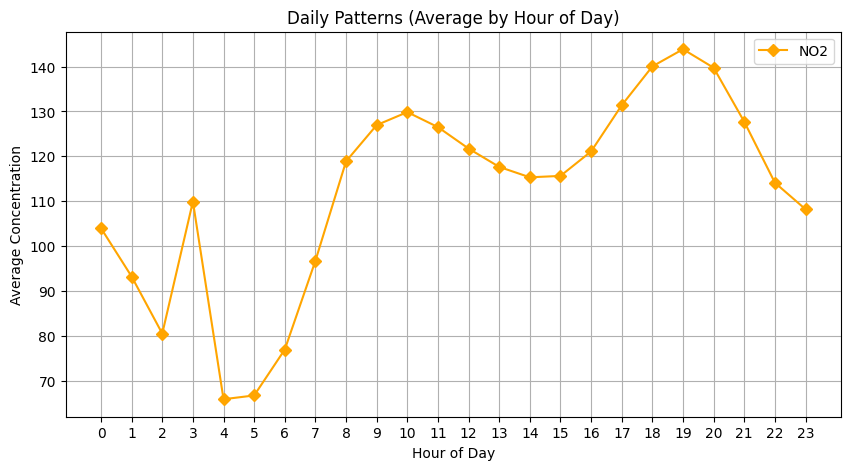

In [17]:
# Daily / Weekly patterns

# Daily
# Format date
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].str.replace('.', ':'), format='%Y-%m-%d %H:%M:%S')
df['Hour'] = df['DateTime'].dt.hour

# Group by Hour and compute mean
hourly_avg = df.groupby('Hour')[['CO(GT)', 'NOx(GT)', 'C6H6(GT)', 'NO2(GT)']].mean()

# Plot Daily Pattern for CO
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg['CO(GT)'], marker='o', label='CO', color='blue')

plt.title('Daily Patterns (Average by Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Concentration')
plt.xticks(range(24))  # Set x-axis from 0 to 23 (hours)
plt.grid(True)
plt.legend()
plt.show()

# Plot Daily Pattern for NOx
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg['NOx(GT)'], marker='s', label='NOx', color='red')

plt.title('Daily Patterns (Average by Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Concentration')
plt.xticks(range(24))  # Set x-axis from 0 to 23 (hours)
plt.grid(True)
plt.legend()
plt.show()

# Plot Daily Pattern for Benzene
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg['C6H6(GT)'], marker='^', label='Benzene', color='green')

plt.title('Daily Patterns (Average by Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Concentration')
plt.xticks(range(24))  # Set x-axis from 0 to 23 (hours)
plt.grid(True)
plt.legend()
plt.show()

# Plot Daily Pattern for NO2
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg['NO2(GT)'], marker='D', label='NO2', color='orange')

plt.title('Daily Patterns (Average by Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Concentration')
plt.xticks(range(24))  # Set x-axis from 0 to 23 (hours)
plt.grid(True)
plt.legend()
plt.show()

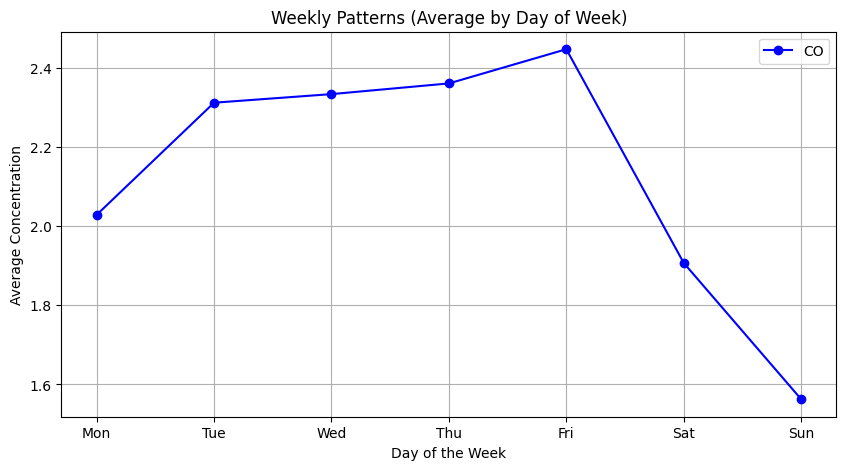

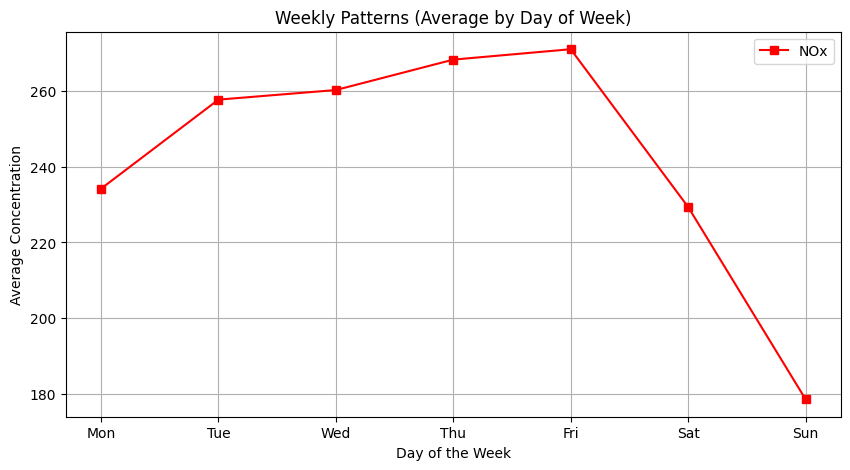

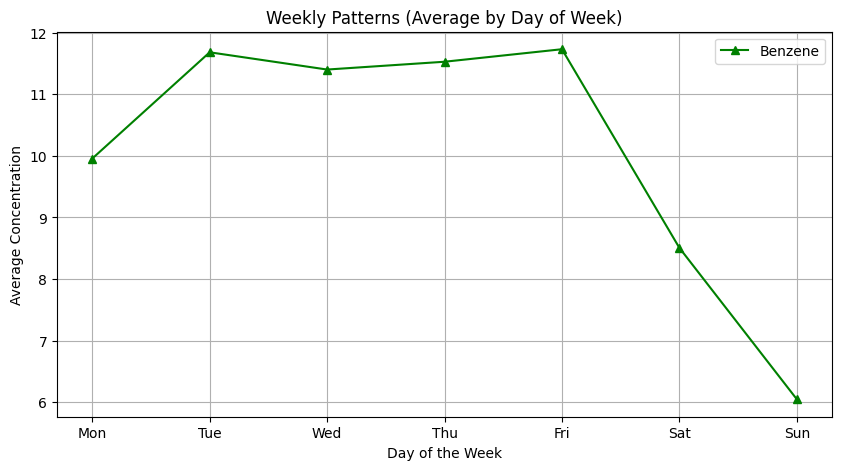

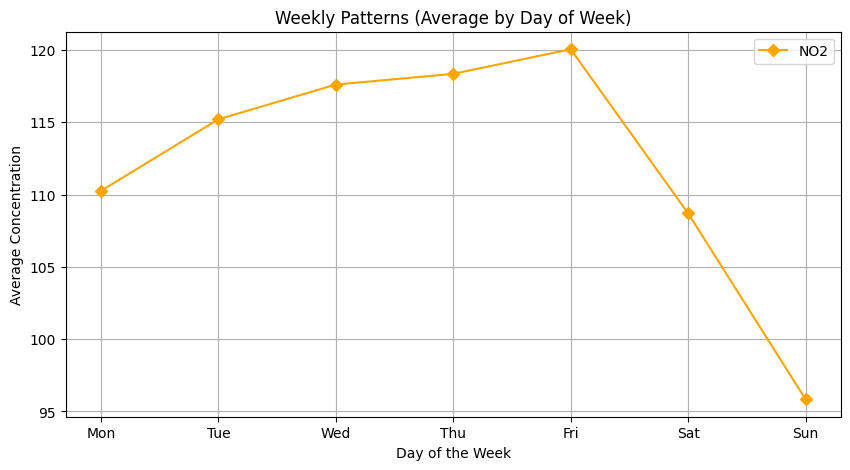

In [18]:
# Daily / Weekly patterns

# Weekly
# Format date
df['Day_of_Week'] = df['DateTime'].dt.dayofweek

# Group by day of week and compute mean
weekly_avg = df.groupby('Day_of_Week')[['CO(GT)', 'NOx(GT)', 'C6H6(GT)', 'NO2(GT)']].mean()

# Define custom labels for days of the week
days_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot Weekly Pattern for CO
plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg['CO(GT)'], marker='o', label='CO', color='blue')

plt.xticks(ticks=range(7), labels=days_labels)  # Set custom day labels
plt.title('Weekly Patterns (Average by Day of Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Concentration')
plt.grid(True)
plt.legend()
plt.show()

# Plot Weekly Pattern for NOx
plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg['NOx(GT)'], marker='s', label='NOx', color='red')

plt.xticks(ticks=range(7), labels=days_labels)  # Set custom day labels
plt.title('Weekly Patterns (Average by Day of Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Concentration')
plt.grid(True)
plt.legend()
plt.show()

# Plot Weekly Pattern for Benzene
plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg['C6H6(GT)'], marker='^', label='Benzene', color='green')

plt.xticks(ticks=range(7), labels=days_labels)  # Set custom day labels
plt.title('Weekly Patterns (Average by Day of Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Concentration')
plt.grid(True)
plt.legend()
plt.show()

# Plot Weekly Pattern for NO2
plt.figure(figsize=(10, 5))
plt.plot(weekly_avg.index, weekly_avg['NO2(GT)'], marker='D', label='NO2', color='orange')

plt.xticks(ticks=range(7), labels=days_labels)  # Set custom day labels
plt.title('Weekly Patterns (Average by Day of Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Concentration')
plt.grid(True)
plt.legend()
plt.show()

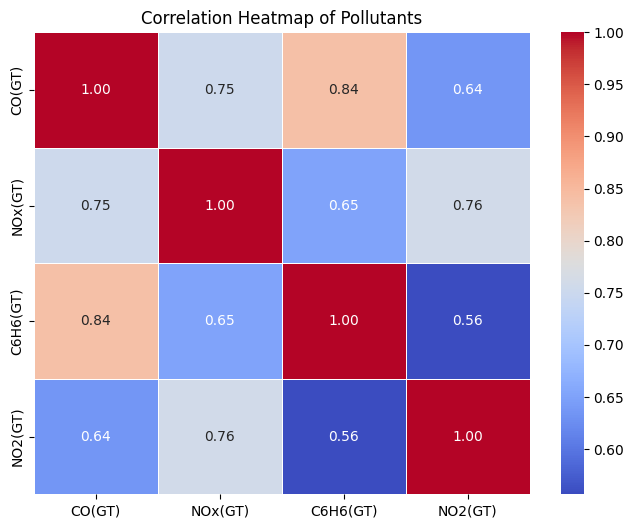

In [19]:
# Correlation heatmap
# Compute correlation matrix

pollutant_data = df[['CO(GT)', 'NOx(GT)', 'C6H6(GT)','NO2(GT)']]
corr_matrix = pollutant_data.corr()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation Heatmap of Pollutants")

# Show plot
plt.show()

<Figure size 1000x500 with 0 Axes>

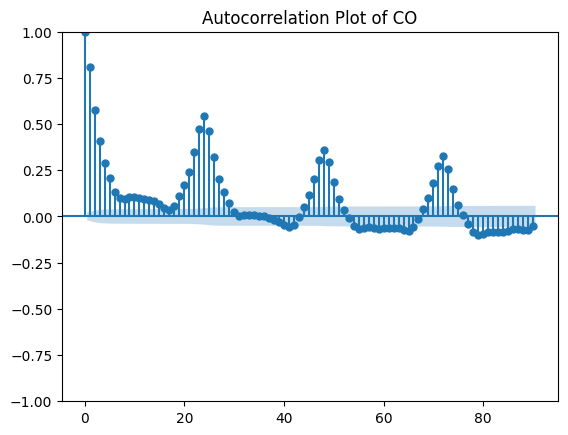

<Figure size 1000x500 with 0 Axes>

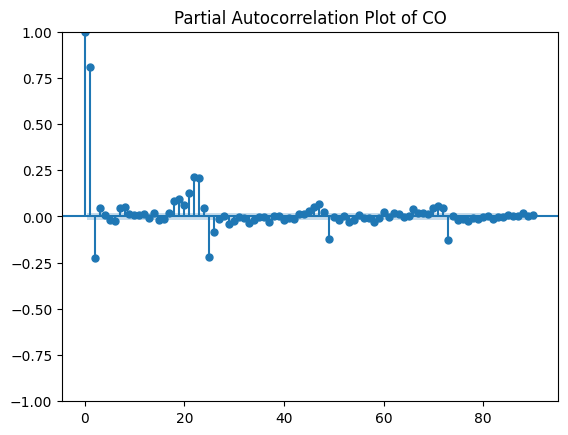

<Figure size 1000x500 with 0 Axes>

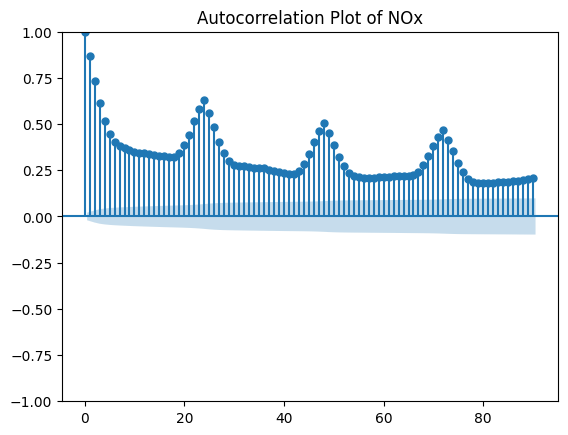

<Figure size 1000x500 with 0 Axes>

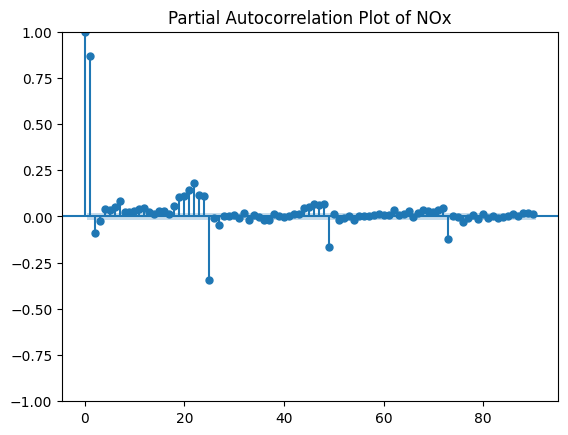

<Figure size 1000x500 with 0 Axes>

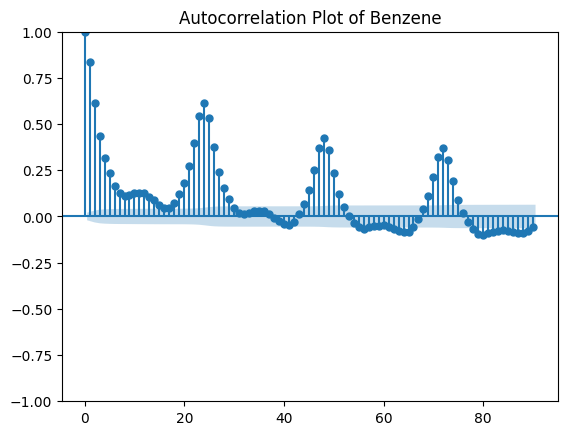

<Figure size 1000x500 with 0 Axes>

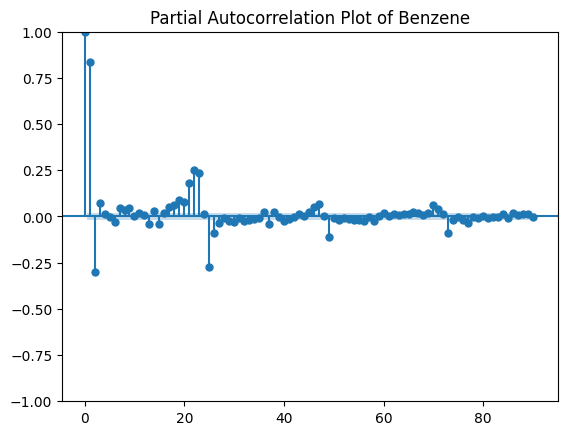

<Figure size 1000x500 with 0 Axes>

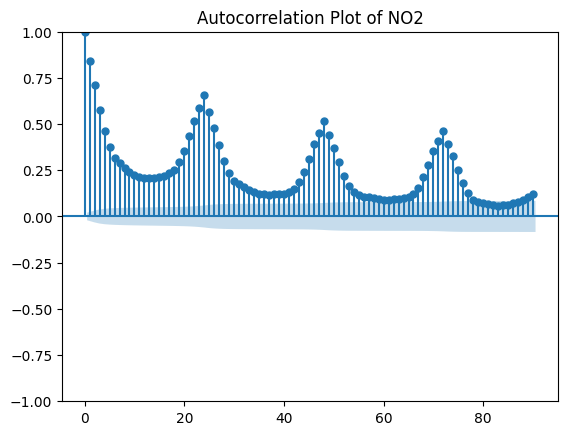

<Figure size 1000x500 with 0 Axes>

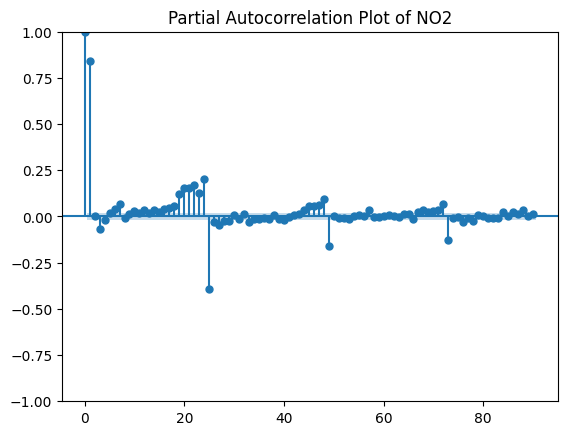

In [20]:
# Set the 'DateTime' as the index
df.set_index('DateTime')

# Autocorrelation Plot (ACF) for CO
plt.figure(figsize=(10, 5))
plot_acf(df['CO(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Autocorrelation Plot of CO')
plt.show()

# Partial Autocorrelation Plot (PACF) for CO
plt.figure(figsize=(10, 5))
plot_pacf(df['CO(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Partial Autocorrelation Plot of CO')
plt.show()

# Autocorrelation Plot (ACF) for NOx
plt.figure(figsize=(10, 5))
plot_acf(df['NOx(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Autocorrelation Plot of NOx')
plt.show()

# Partial Autocorrelation Plot (PACF) for NOx
plt.figure(figsize=(10, 5))
plot_pacf(df['NOx(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Partial Autocorrelation Plot of NOx')
plt.show()

# Autocorrelation Plot (ACF) for Benzene
plt.figure(figsize=(10, 5))
plot_acf(df['C6H6(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Autocorrelation Plot of Benzene')
plt.show()

# Partial Autocorrelation Plot (PACF) for Benzene
plt.figure(figsize=(10, 5))
plot_pacf(df['C6H6(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Partial Autocorrelation Plot of Benzene')
plt.show()

# Autocorrelation Plot (ACF) for NO2
plt.figure(figsize=(10, 5))
plot_acf(df['NO2(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Autocorrelation Plot of NO2')
plt.show()

# Partial Autocorrelation Plot (PACF) for NO2
plt.figure(figsize=(10, 5))
plot_pacf(df['NO2(GT)'], lags=90)  # You can change 'lags' to the number of lags you want to analyze
plt.title('Partial Autocorrelation Plot of NO2')
plt.show()

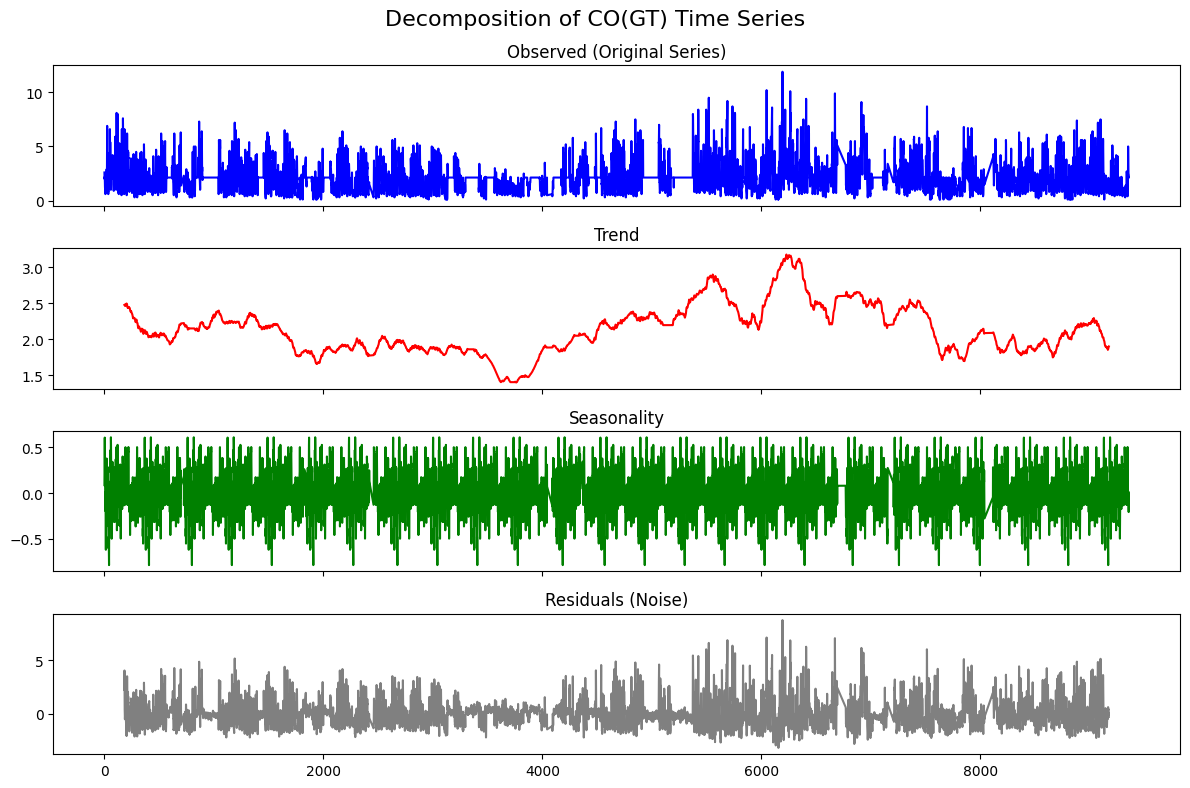

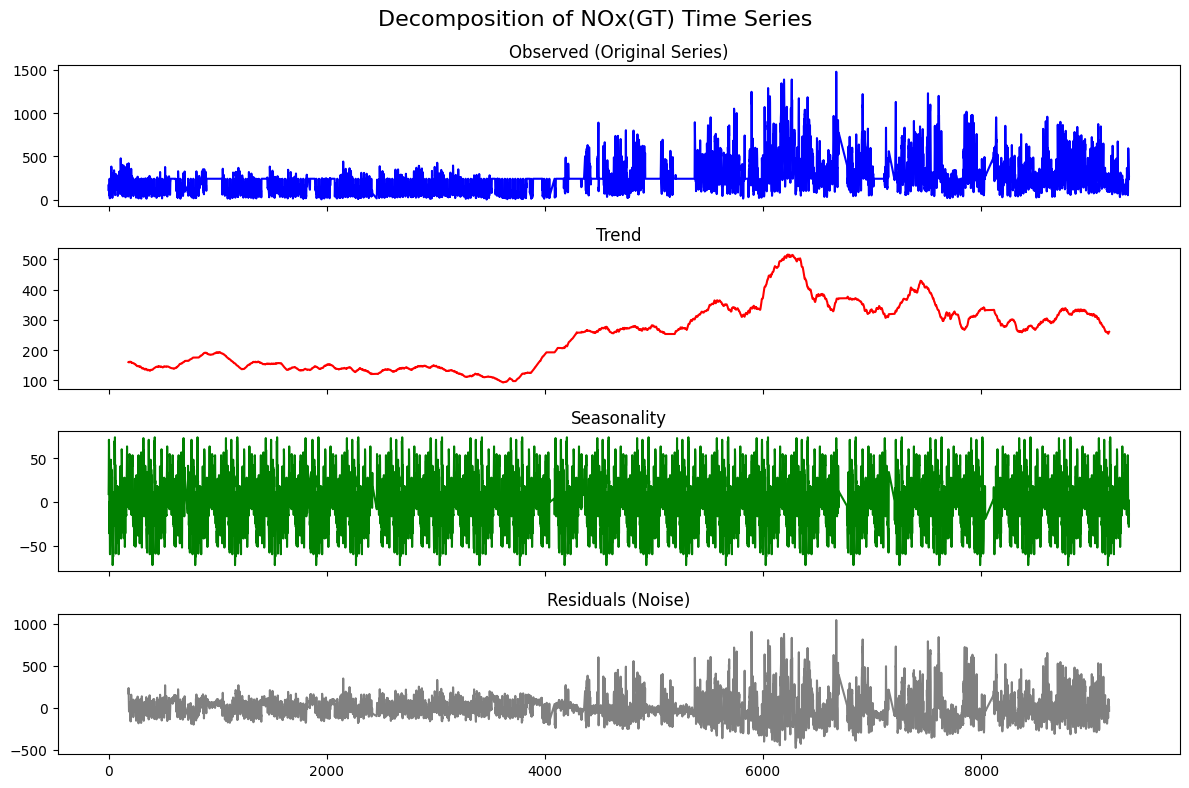

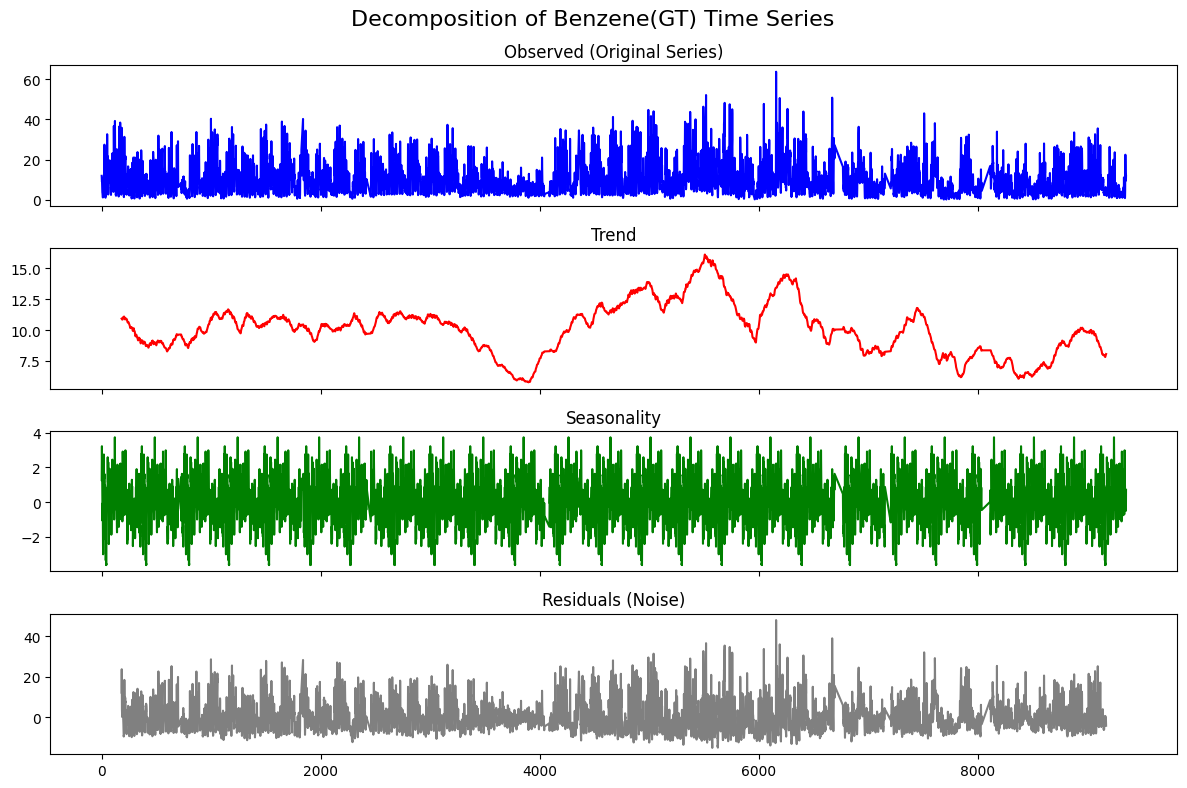

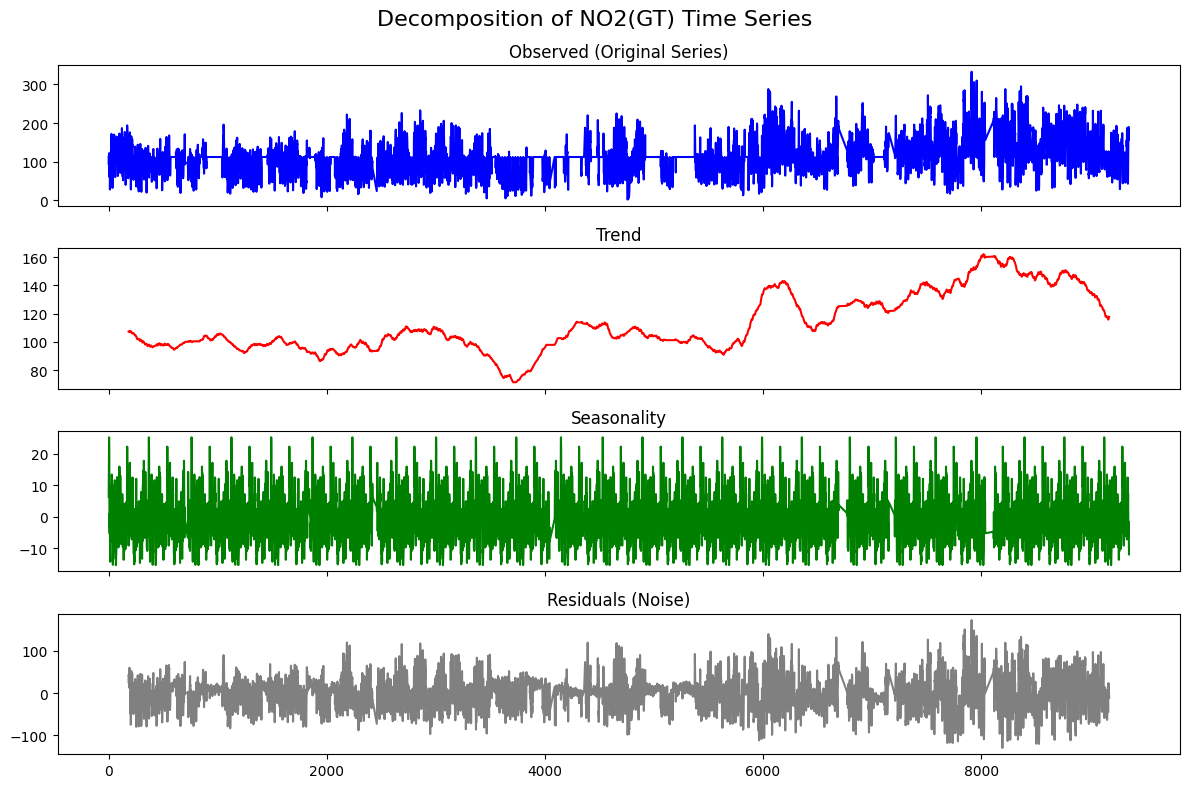

In [21]:
# Decompose the time series into trend, seasonal, and residual components
# CO
ts_co = df['CO(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='additive', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")

plt.suptitle("Decomposition of CO(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# NOx
ts_co = df['NOx(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='additive', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
plt.suptitle("Decomposition of NOx(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# Benzene
ts_co = df['C6H6(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='additive', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
# Add a title for the entire figure
plt.suptitle("Decomposition of Benzene(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# NO2
ts_co = df['NO2(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='additive', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
# Add a title for the entire figure
plt.suptitle("Decomposition of NO2(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

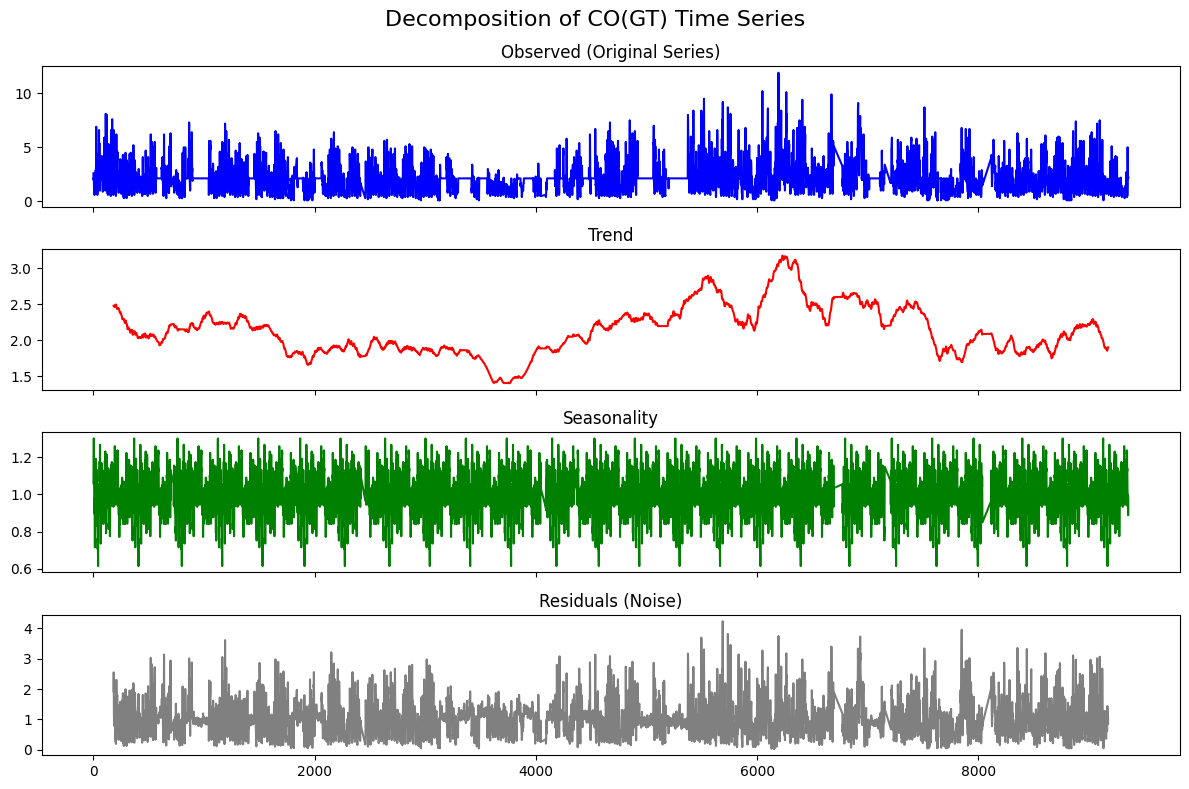

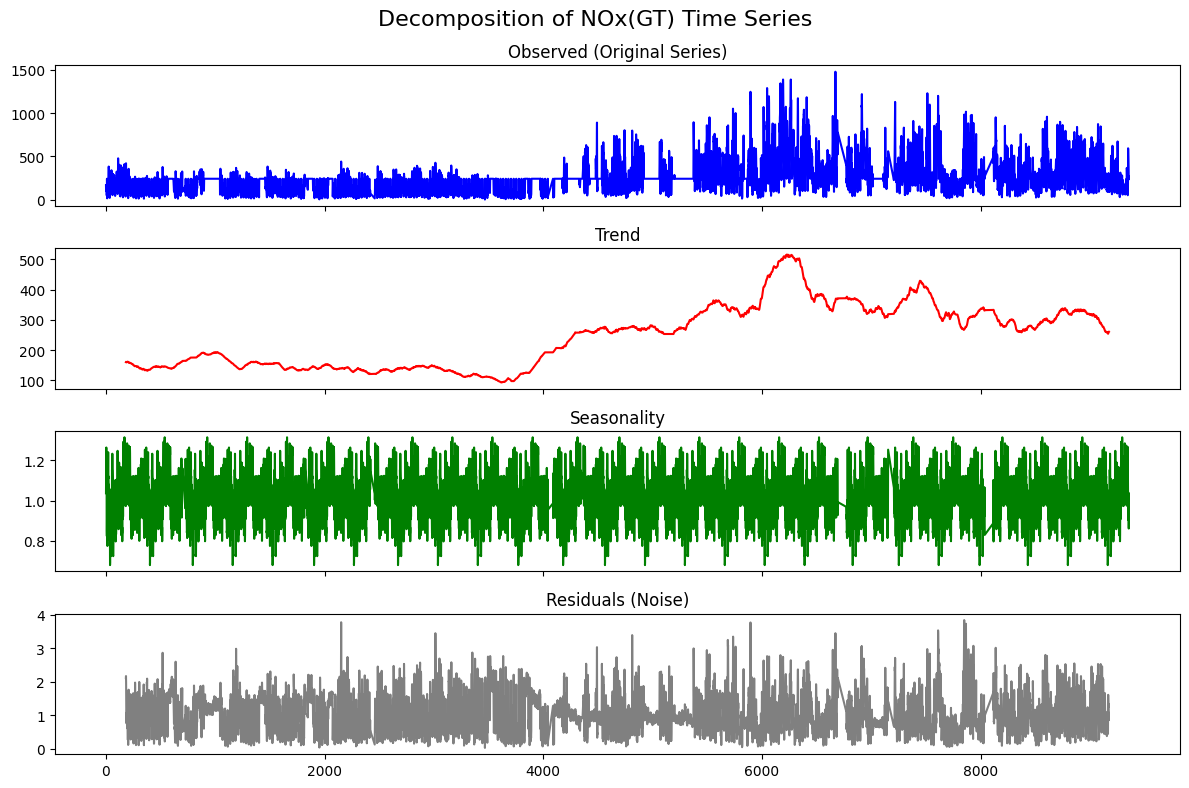

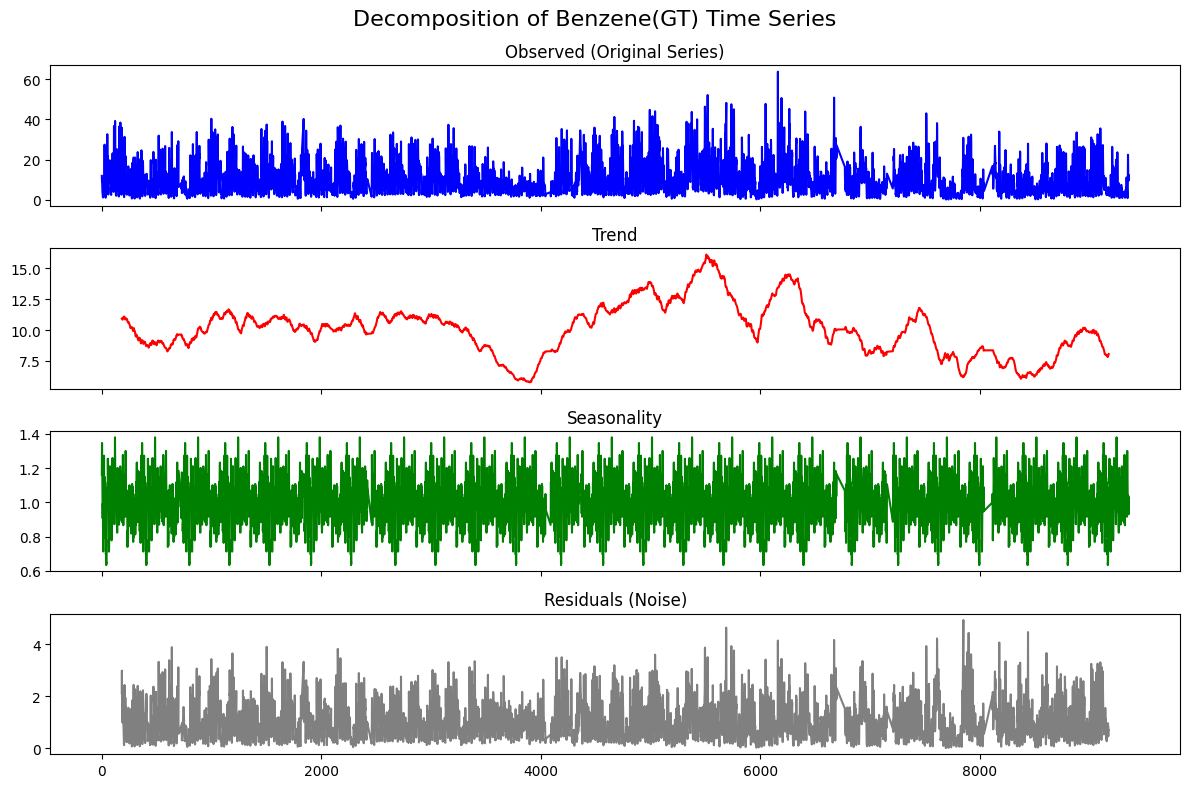

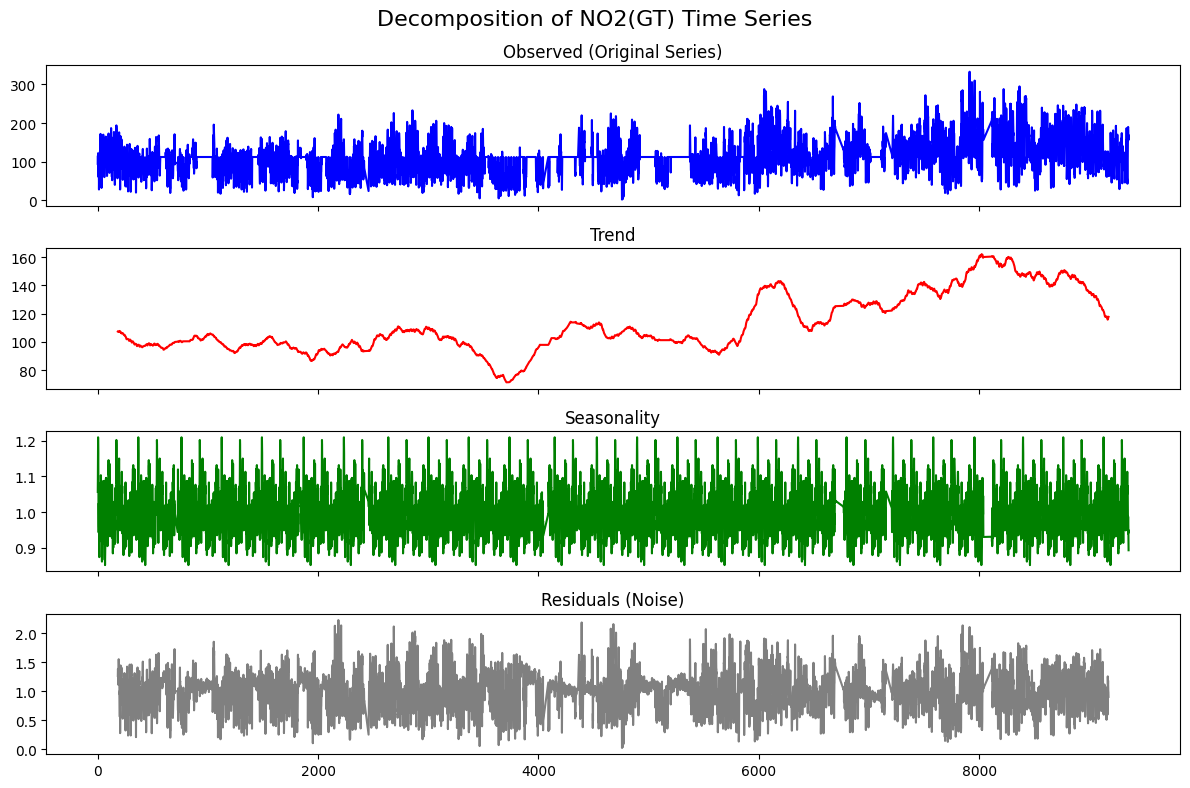

In [22]:
# Decompose the time series into trend, seasonal, and residual components
# Multiplicative
# CO
ts_co = df['CO(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='multiplicative', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")

plt.suptitle("Decomposition of CO(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# NOx
ts_co = df['NOx(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='multiplicative', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
plt.suptitle("Decomposition of NOx(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# Benzene
ts_co = df['C6H6(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='multiplicative', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
# Add a title for the entire figure
plt.suptitle("Decomposition of Benzene(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()

# NO2
ts_co = df['NO2(GT)']

# STL Decomposition
decomposition = seasonal_decompose(ts_co, model='multiplicative', period=365)  # 'period' depends on data frequency

# Plot the Decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], color='blue', title="Observed (Original Series)")
decomposition.trend.plot(ax=axes[1], color='red', title="Trend")
decomposition.seasonal.plot(ax=axes[2], color='green', title="Seasonality")
decomposition.resid.plot(ax=axes[3], color='gray', title="Residuals (Noise)")
# Add a title for the entire figure
plt.suptitle("Decomposition of NO2(GT) Time Series", fontsize=16)

plt.tight_layout()
plt.show()